# PROJECT - Gender Bias on Analyzing Police Activity

On a normal day in the United States, law enforcement produces more than 50,000 traffic stops. To understand the interactions between police officers and the public during these traffic stops, a team named The Stanford Open Policing Project is collecting the data  and making it available for free [here](https://openpolicing.stanford.edu/data/).

This dataset contains information from the state of Rhode Island State. The objective of this project is to discover if gender bias exists on search conductions, the type of search and the outcomes of each search. The work that will be done is using descriptive statistic (describing the sample data). This project does not try to infer from the data. 


## 1. Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
import requests
from os import path

In [2]:
def collect(url, name_file):
    if path.exists(name_file) == False:
        response = requests.get(url)
        with open(name_file, mode='wb') as file:
            file.write(response.content)
    else:
        pass
    return name_file

In [3]:
def upload(name_file):
    dataframe = pd.read_csv(name_file) 
    return dataframe

In [4]:
url = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'

name_file = collect(url, 'police.csv')
dataframe = upload(name_file)
dataframe.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [6]:
dataframe.violation.unique()

array(['Equipment', 'Speeding', 'Other', nan, 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

## 2. Data Cleaning 

In [55]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

* Column `state` only has one value RI, therefore this column will be dropped.

In [56]:
dataframe.state.nunique()

1

In [57]:
dataframe.drop(columns=['state'], inplace=True)

* Column `stop_date` and `stop_time` must be combined and then convert to datetime. These columns will be merge on a new column called `stop_date_time`. Finally, `stop_date` and `stop_time` columns will be dropped.

In [58]:
dataframe['stop_date_time'] = dataframe['stop_date'] + ' ' + dataframe['stop_time']
dataframe['stop_date_time'] = pd.to_datetime(dataframe['stop_date_time'])
dataframe.drop(columns=['stop_date', 'stop_time'], inplace=True)
print(dataframe.columns)
print('--------')
print(dataframe.stop_date_time.dtype)

Index(['county_name', 'driver_gender', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'district',
       'stop_date_time'],
      dtype='object')
--------
datetime64[ns]


* The `county_name` column is empty, therefore it will be dropped.

In [59]:
dataframe.county_name.value_counts()

Series([], Name: county_name, dtype: int64)

In [60]:
dataframe.drop(columns=['county_name'], inplace=True)

In [61]:
dataframe.columns

Index(['driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district', 'stop_date_time'],
      dtype='object')

* `is_arrested`, `search_conducted` and `drugs_related_stop` columns have only True and False values. They will be converted to boolean type.

In [62]:
dataframe.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [63]:
dataframe.drugs_related_stop.value_counts()

False    90879
True       862
Name: drugs_related_stop, dtype: int64

In [64]:
dataframe.is_arrested.value_counts()

False    83461
True      3078
Name: is_arrested, dtype: int64

In [65]:
dataframe['search_conducted'] = dataframe['search_conducted'].astype(bool)
dataframe['drugs_related_stop'] = dataframe['drugs_related_stop'].astype(bool)
dataframe['is_arrested'] = dataframe['is_arrested'].astype(bool)

In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   driver_gender       86536 non-null  object        
 1   driver_race         86539 non-null  object        
 2   violation_raw       86539 non-null  object        
 3   violation           86539 non-null  object        
 4   search_conducted    91741 non-null  bool          
 5   search_type         3307 non-null   object        
 6   stop_outcome        86539 non-null  object        
 7   is_arrested         91741 non-null  bool          
 8   stop_duration       86539 non-null  object        
 9   drugs_related_stop  91741 non-null  bool          
 10  district            91741 non-null  object        
 11  stop_date_time      91741 non-null  datetime64[ns]
dtypes: bool(3), datetime64[ns](1), object(8)
memory usage: 6.6+ MB


* `driver_race`, `violation_raw`, `violation`, `stop_outcome` and `stop_duration` columns have 5202 missing values. `driver_gender` column has 5205 missing values. Since the `driver_gender` column is one of the most important columns for this analysis, missing values will be dropped using this column as a reference.

In [67]:
dataframe.isnull().sum()

driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested               0
stop_duration          5202
drugs_related_stop        0
district                  0
stop_date_time            0
dtype: int64

In [68]:
dataframe.dropna(subset=['driver_gender'], inplace=True)

In [69]:
dataframe.isnull().sum()

driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
stop_date_time            0
dtype: int64

* `search_type` column has 83229 missing values. The reason is that this column is only available when the column `search_conducted` is True.

In [70]:
dataframe.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_date_time
0,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [71]:
df = dataframe

## 3. Answering questions

### * Do the genders commit different violations?

We need to first explore violations commited by all people.

In [72]:
all_violations = df['violation'].value_counts(normalize=True).reset_index()
all_violations

,index,violation
0,Speeding,0.559571
1,Moving violation,0.187483
2,Equipment,0.126202
3,Other,0.050950
4,Registration/plates,0.042791
5,Seat belt,0.033004


In [73]:
women = df[df['driver_gender'] == 'F']
men = df[df['driver_gender'] == 'M']

In [74]:
violation_women = women.violation.value_counts(normalize=True).reset_index()
violation_women

,index,violation
0,Speeding,0.658114
1,Moving violation,0.138218
2,Equipment,0.105199
3,Registration/plates,0.044418
4,Other,0.029738
5,Seat belt,0.024312


In [75]:
violation_men = men.violation.value_counts(normalize=True).reset_index()
violation_men

,index,violation
0,Speeding,0.522243
1,Moving violation,0.206144
2,Equipment,0.134158
3,Other,0.058985
4,Registration/plates,0.042175
5,Seat belt,0.036296


In [76]:
def ploting(dataframe, title, name_file):
    
    """
    This function graphs the relative frequency of each violation commited by each gender.
    
    #Parameters:
    
        dataframe(dataframe): dataframe filtered by sex.
        title(str): Title of the graph.
        name_file(str): Name given to the file.
        
    #Returns:
    
        It does not return anything but creates a graph and saves it in .png format.
    """
    
    g = sns.barplot(data=dataframe, x='index', y='violation', color='blue')
    g.set_title(title) #add title
    
    #set xlabel and ylabel names as well as the Y upper limit
    g.set(xlabel='violations', ylabel='relative frequency', ylim=(0, 1))
    
    g.set_xticklabels(list(dataframe['index']), rotation=90) #add label names in the x-axis
    
    #collecting x and y locations to add number above bars.
    x_locations = np.arange(0,6)
    y_locations = np.array(dataframe['violation'])
    
    #looping  over locations to add text on the top of each bar.
    for x, y in zip(x_locations,y_locations):
        g.text(x,y+0.01,str(round(y*100,2))+'%', ha='center')
        
    #saving figure in .png format
    g.figure.savefig(name_file + '.png', bbox_inches='tight')

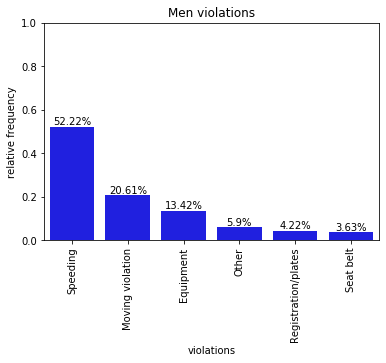

In [77]:
ploting(violation_men, 'Men violations', 'men_violations')

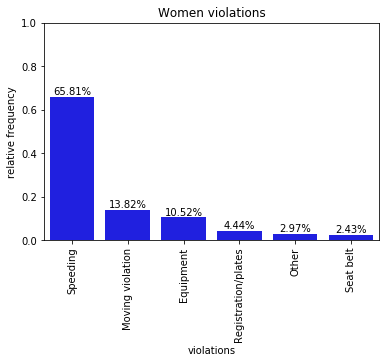

In [78]:
ploting(violation_women, 'Women violations', 'women_violations')

### * Does gender affect who gets a ticket for each violation?

In [79]:
df.stop_outcome.unique()

array(['Citation', 'Arrest Driver', 'Warning', 'N/D', 'No Action',
       'Arrest Passenger'], dtype=object)

In [80]:
df.violation.unique()

array(['Equipment', 'Speeding', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [81]:
def outcome(violation_dataframe):
    
    """
    This function divides a dataframe into males and females and takes the relative frequency of each value in
    the stop_outcome column. Then it merges the male and female dataframe to make only one dataframe.
    
    This function will be used inside the sorted_melted_df function.
    
    #Parameters:
    
        violation_dataframe (dataframe): filtered dataframe by violation e.g. df[df['violation'] == 'Speeding']
        
    #Returns:
    
        merge_df (dataframe): merge dataframe
    
    

    """
    
    #Dividing dataframe into two parts, men and women
    men_violation = violation_dataframe[violation_dataframe['driver_gender']=='M']['stop_outcome'].value_counts(normalize=True).reset_index()
    women_violation = violation_dataframe[violation_dataframe['driver_gender']=='F']['stop_outcome'].value_counts(normalize=True).reset_index()
    
    #Merging dataframe
    merge_df = pd.merge(men_violation, women_violation, on='index', suffixes=['_men', '_women'])
    
    return merge_df

In [82]:
def sorted_melted_df():
    
    """
    This function loops over each unique value in the 'violation' column of the dataframe and applies the outcome() function
    on each dataframe. The it stores all the dataframes in one list. All the dataframes on the list are place into one
    list. The list is then melted and cleaned. 
    
    #Returns:
    
        sorted_melted_df (dataframe)    
    
    """

    list_df = [] #empty list where we will store the dataframes
    violation_unique_list = list(df['violation'].unique()) #unique violation values list


    for violation in violation_unique_list:
            violation_dataframe = df[df['violation']==violation]
            merge_df = outcome(violation_dataframe) #function outcome previously built
            merge_df['violation'] = violation #adding column with the tag name of the dataframe e.g. Speeding
            list_df.append(merge_df) #stores dataframe inside list_df

    violation_hole = pd.concat(list_df) #concatenates all dataframes in list_df in one dataframe.
    
    #converts the stop_outcome_men and stop_outcome_women columns into rows. 
    melted_df = pd.melt(violation_hole, id_vars=['index', 'violation'], value_vars=['stop_outcome_men', 'stop_outcome_women'],
                            var_name='gender', value_name='value')
    
    #melted_df['gender'] = melted_df['gender'].str.split('_').str[-1]
    
    #sorting values first by violation and then by value in descending order
    sorted_melted_df = melted_df.sort_values(by=['violation', 'value'], ascending=False)
    #converts 'stop_outcome_men' to 'M' and 'stop_outcome_women' into 'F'
    sorted_melted_df['gender'] = sorted_melted_df['gender'].apply(lambda x: 'F' if x=='stop_outcome_women' else 'M')
    #sorted_melted_df['index'] = sorted_melted_df['index'].apply(lambda y: 'n_d' if y=='N/D' else y)

    #indexes are restored from e.g. 8 3 1 to 1 2 3
    sorted_melted_df = sorted_melted_df.reset_index(drop=True)
    #sorted_melted_df['outcome'] = sorted_melted_df['index'].apply(lambda x: 'n_d' if x=='N/D')
    
    return sorted_melted_df

In [83]:
def generate_plot_different(dataframe, title, file_name):
    
    """ 
    This function uses a dataframe and converts it into a barplot graph. On the x-axis is the 'violation' column and in the
    y axis the relative frequencies. Two bars for each violation will be used (orange for females and blue for males).
    
    This function will be used to generate a graph for each outcome.
    
    #Parameters:
    
        dataframe(dataframe): dataframe that has been previously been filtered by outcome
        title(str)
        file_name(str)
        
    #Returns:
    
        It does not return any value but it graphs the barplot and saves image in .png format. 
    
    """
    
    #setting the size of the figure
    plt.figure(figsize=(10,5))
    # creating barplot object
    g = sns.barplot(data=dataframe, x='violation', y='value', hue='gender', palette=["C1", "C0"], hue_order=['F', 'M'])
    g.set_title(title) #adding title to the graph
    g.set(xlabel='violation', ylabel='relative frequency', ylim=(0, 1)) #adding x and y label names. Y limit is also added.
    
    #Collecting locations to add text over the bar plots
    x_locations = np.arange(0,6)
    y_locations_male = np.array(dataframe[dataframe['gender']=='M']['value'])
    y_locations_female = np.array(dataframe[dataframe['gender']=='F']['value'])
    
    #looping over each location to add text over the bar plots. y is for males and z is for females.
    #each relative frequency will be converted into percentage and be added over each bar. 
    for x, y, z in zip(x_locations,y_locations_male, y_locations_female):
        g.text(x+0.2,y,str(round(y*100,2))+'%', ha='center')
        g.text(x-0.2,z,str(round(z*100,2)) + '%', ha='center')
    
    #image is saved in .png format
    g.figure.savefig(file_name + '.png', bbox_inches='tight')

In [84]:
sorted_melted_df = sorted_melted_df()

In [85]:
sorted_melted_df['index'].unique()

array(['Citation', 'Warning', 'Arrest Driver', 'Arrest Passenger',
       'No Action', 'N/D'], dtype=object)

In [86]:
sorted_melted_df = sorted_melted_df[sorted_melted_df['index'] != 'N/D']

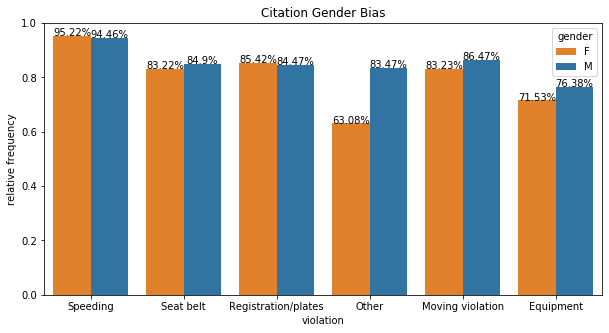

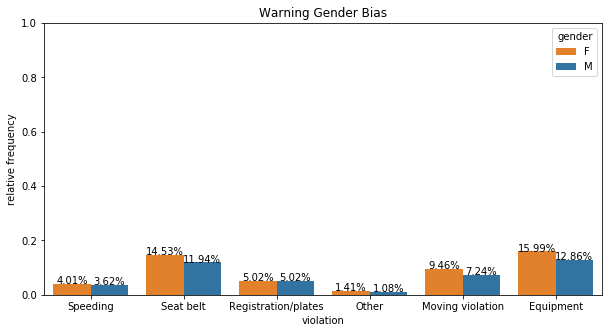

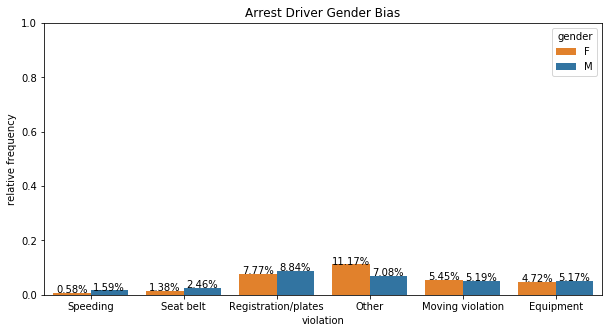

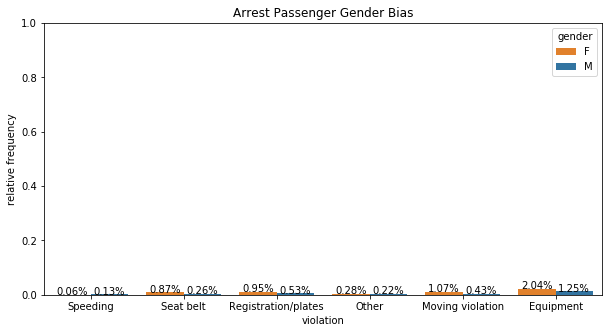

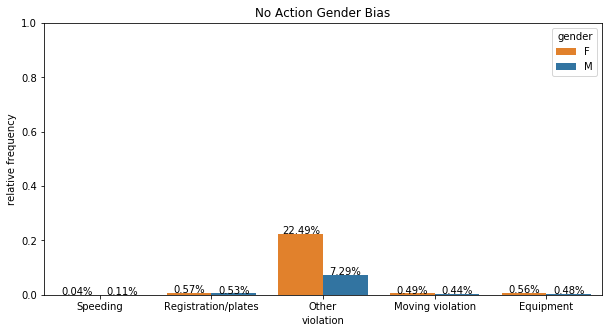

In [87]:
list_outcome = list(sorted_melted_df['index'].unique())
for outcome in list_outcome:
    dg = sorted_melted_df[sorted_melted_df['index']==outcome]
    generate_plot_different(dg, outcome + ' Gender Bias', outcome);

In [88]:
list(sorted_melted_df['index'].unique())

['Citation', 'Warning', 'Arrest Driver', 'Arrest Passenger', 'No Action']

### *Does gender affect whose vehicle is searched for each violation? 

In [94]:
df_seached = df.groupby(['violation',
            'driver_gender'])['search_conducted'].mean().reset_index().sort_values(by='search_conducted',
                                                                                   ascending=False).reset_index(drop=True)

In [95]:
df_seached

,violation,driver_gender,search_conducted
0,Registration/plates,M,0.108802
1,Equipment,M,0.071496
2,Moving violation,M,0.061524
3,Registration/plates,F,0.054924
4,Other,M,0.046191
5,Other,F,0.041018
6,Equipment,F,0.039984
7,Moving violation,F,0.039257
8,Seat belt,M,0.035119
9,Speeding,M,0.027885


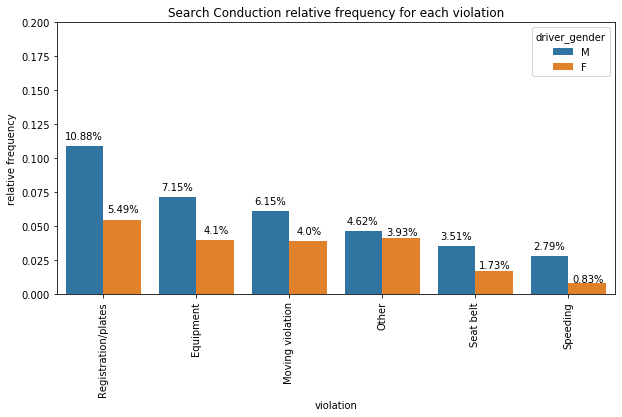

In [96]:
plt.figure(figsize=(10,5))
ge = sns.barplot(data=df_seached, x='violation', y='search_conducted', hue='driver_gender')
plt.xticks(rotation=90)
plt.ylim([0,0.2])
x_locations = np.arange(0,6)
y_locations_male = np.array(df_seached[df_seached['driver_gender']=='M']['search_conducted'])
y_locations_female = np.array(df_seached[df_seached['driver_gender']=='F']['search_conducted'])
plt.title('Search Conduction relative frequency for each violation')
plt.xlabel('violation')
plt.ylabel('relative frequency')
    
for x, y, z in zip(x_locations,y_locations_male, y_locations_female):
    ge.text(x-0.21,y+0.005,str(round(y*100,2)) + '%', ha='center')
    ge.text(x+0.21,z+z*0.1,str(round(z*100,2)) + '%', ha='center')
    
ge.figure.savefig('search_conduction.png', bbox_inches='tight')

### * Is there gender bias on the type of search? 

In [41]:
df['search_type'].value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [42]:
df['search_conducted'].value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [43]:
search_type_list = ['Incident to Arrest', 'Probable Cause', 'Inventory', 'Reasonable Suspicion', 'Protective Frisk']

In [44]:
for j in search_type_list:
    df[j] = df['search_type'].str.contains(j, na=False)

In [45]:
searched = df[df['search_conducted']==True]
searched = searched.groupby('driver_gender')[search_type_list].mean().reset_index()
searched

,driver_gender,Incident to Arrest,Probable Cause,Inventory,Reasonable Suspicion,Protective Frisk
0,F,0.546053,0.326754,0.175439,0.059211,0.074561
1,M,0.484742,0.367941,0.126622,0.101017,0.094353


In [46]:
searched_sorted = pd.melt(searched, id_vars='driver_gender',
                          value_vars=search_type_list,
                          var_name='search_type').sort_values(by=['search_type','value'],
                                                                   ascending=False).reset_index(drop=True)
searched_sorted

,driver_gender,search_type,value
0,M,Reasonable Suspicion,0.101017
1,F,Reasonable Suspicion,0.059211
2,M,Protective Frisk,0.094353
3,F,Protective Frisk,0.074561
4,M,Probable Cause,0.367941
5,F,Probable Cause,0.326754
6,F,Inventory,0.175439
7,M,Inventory,0.126622
8,F,Incident to Arrest,0.546053
9,M,Incident to Arrest,0.484742


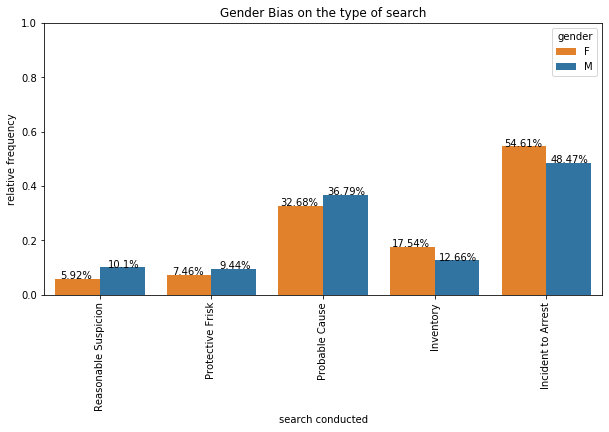

In [48]:
plt.figure(figsize=(10,5))
je = sns.barplot(data=searched_sorted, x='search_type', y='value', hue='driver_gender', hue_order=['F', 'M'], palette=["C1", "C0"])
plt.xlabel('search conducted')
plt.ylabel('relative frequency')
plt.title('Gender Bias on the type of search')
plt.xticks(rotation=90)
plt.legend(title='gender')
plt.ylim([0,1])
x_locations = np.arange(0,5)
y_locations_male = np.array(searched_sorted[searched_sorted['driver_gender']=='F']['value'])
y_locations_female = np.array(searched_sorted[searched_sorted['driver_gender']=='M']['value'])
    
for x, y, z in zip(x_locations,y_locations_male, y_locations_female):
    je.text(x-0.21,y,str(round(y*100,2)) + '%', ha='center')
    je.text(x+0.21,z,str(round(z*100,2)) + '%', ha='center');
    
je.figure.savefig('type_search.png', bbox_inches='tight')